# Импортируем библиотеки

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

# Загружаеи и подготавливаем данные из CIFAR10

In [13]:
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()
training_images, testing_images = training_images / 255, testing_images / 255

170500096/170498071 [==============================] - 8s 0us/step


Набор классов

In [14]:
class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog',  'Frog', 'Horse', 'Ship', 'Truck']

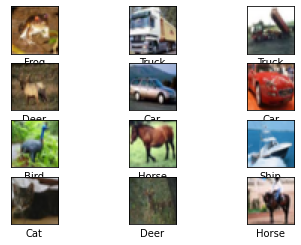

In [20]:
for i in range(12):
  plt.subplot(4,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(training_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[training_labels[i][0]])

plt.show()

In [25]:
training_images = training_images[:20000]
training_labels = training_labels[:20000]
testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

# Создаем сверточную базу

*   Добавляем плотные слои сверху
*   Скомпилируем и обучаем модель

In [26]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))


loss, accuracy = model.evaluate(testing_images,testing_labels)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

model.save('image_classifier.model')

Epoch 1/10
625/625 [==============================] - 28s 43ms/step - loss: 1.9511 - accuracy: 0.2708 - val_loss: 1.4697 - val_accuracy: 0.4748
Epoch 2/10
625/625 [==============================] - 27s 43ms/step - loss: 1.4114 - accuracy: 0.4846 - val_loss: 1.3113 - val_accuracy: 0.5303
Epoch 3/10
625/625 [==============================] - 27s 42ms/step - loss: 1.2361 - accuracy: 0.5608 - val_loss: 1.2667 - val_accuracy: 0.5518
Epoch 4/10
625/625 [==============================] - 27s 43ms/step - loss: 1.1230 - accuracy: 0.6046 - val_loss: 1.0924 - val_accuracy: 0.6120
Epoch 5/10
625/625 [==============================] - 27s 43ms/step - loss: 1.0392 - accuracy: 0.6371 - val_loss: 1.0620 - val_accuracy: 0.6220
Epoch 6/10
625/625 [==============================] - 26s 42ms/step - loss: 0.9515 - accuracy: 0.6669 - val_loss: 1.0336 - val_accuracy: 0.6352
Epoch 7/10
625/625 [==============================] - 27s 43ms/step - loss: 0.8915 - accuracy: 0.6869 - val_loss: 1.0571 - val_accuracy:

Сохраняем модель

In [28]:
model = models.load_model('image_classifier.model')

Протестируем модель на произвольном изображении из интернета с размером 32x32


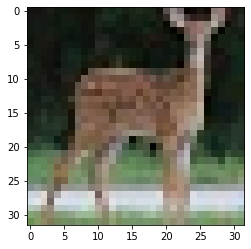

In [29]:
img = cv.imread('deer1.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img, cmap=plt.cm.binary)

In [31]:
prediction = model.predict(np.array([img])/255)
print(prediction)
index = np.argmax(prediction)
print(f'Prediction is: {class_names[index]}')

[[6.2642258e-04 1.8964299e-04 3.4332648e-02 2.0087965e-01 3.4824580e-01
  1.6984059e-01 6.9505041e-03 2.3835695e-01 1.1414739e-04 4.6360577e-04]]
Prediction is: Deer
